🔴 Nota: He pulido un poco más el proceso de detección de anomalías respecto al ejercicio anterior del modelo supervisado, implementando Z-score para las variables con distribución normal e IQR para el resto.

# Importar librerias

In [1]:
# Importamos librerías
from google.colab import drive
from sklearn.preprocessing import LabelEncoder # Transformar categoricas a numericas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Carga de datos

Columns
Basic Attributes
* Species: Species of the iris flower (Setosa, Versicolor, Virginica)

Environmental Factors
* Elevation: Elevation level where the iris was found (in meters)
* Soil Type: Type of soil where the iris was found (Loamy, Sandy, Clayey)

Basic Morphological Features
* Sepal Length (cm): Length of the sepal in centimeters
* Sepal Width (cm): Width of the sepal in centimeters
* Petal Length (cm): Length of the petal in centimeters
* Petal Width (cm): Width of the petal in centimeters

Derived Morphological Features
* Sepal Area (cm^2): Area of the sepal calculated as Sepal Length × Sepal Width
* Petal Area (cm^2): Area of the petal calculated as Petal Length × Petal Width
* Sepal Aspect Ratio: Ratio of Sepal Length to Sepal Width
* Petal Aspect Ratio: Ratio of Petal Length to Petal Width
* Sepal-to-Petal Length Ratio: Ratio of Sepal Length to Petal Length
* Sepal-to-Petal Width Ratio: Ratio of Sepal Width to Petal Width
* Sepal-Petal Length Difference: Difference between Sepal Length and Petal Length
* Sepal-Petal Width Difference: Difference between Sepal Width and Petal Width

Advanced Morphological Features
* Petal Curvature (mm): Measure of petal curvature in millimeters
* Petal Texture (trichomes/mm^2): Number of trichomes per square millimeter on the petal
* Leaf Area (cm^2): Area of a typical leaf of the iris plant in square centimeters

Additional Derived Features
* Sepal Area Sqrt: Square root of the Sepal Area
* Petal Area Sqrt: Square root of the Petal Area
* Area Ratios: Custom attribute that captures various area ratios in the dataset


In [2]:
# Montamos y cargamos el fichero con los datos
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Notebooks/intro_ia/Dataset_iris_extended.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descripción del Dataset

In [3]:
df.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,17.870807,5.689068,2.003853,4.016732,1.996762,5.422667,2.08795,1.863317,8.355267,15.052733,60.144650,4.208441,2.106480,15.755674
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.388978,4.585312,0.507508,2.070668,1.035622,5.921786,1.27443,1.004847,3.172975,4.663109,10.224305,0.399956,1.119309,21.891577
min,50.100000,4.040000,1.700000,0.960000,0.050000,9.048000,0.086000,0.978774,1.587379,0.745902,0.841121,-1.55000,-0.340000,3.310000,3.830000,35.160000,3.007989,0.293258,0.818662
25%,110.875000,5.210000,2.690000,1.640000,0.360000,15.554550,0.565825,1.639104,2.855016,1.223277,1.650452,1.14000,1.090000,5.310000,11.280000,52.302500,3.943926,0.752213,2.005655
50%,171.300000,5.840000,3.030000,4.300000,1.290000,17.646400,5.525400,1.970738,3.448642,1.442773,2.170656,1.95500,1.590000,7.925000,15.020000,59.170000,4.200762,2.350617,3.059424
75%,239.125000,6.520000,3.390000,5.200000,1.740000,20.007275,9.256725,2.293932,4.486058,3.059940,9.251453,3.29000,2.740000,10.715000,18.527500,67.305000,4.472949,3.042487,30.764892
max,299.900000,9.120000,4.760000,7.840000,2.990000,29.722600,23.128000,4.082902,34.400000,5.410000,55.800000,4.66000,4.560000,17.890000,29.850000,86.930000,5.451844,4.809158,183.620930


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [5]:
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [6]:
print('ESPECIES DISTINTAS:', df['species'].nunique())
print('SUELOS DISTINTOS:', df['soil_type'].nunique())

ESPECIES DISTINTAS: 3
SUELOS DISTINTOS: 3


# Preparación de datos

In [7]:
# En algún punto más adelante podría ser necesario normalizar, pero podría ser relevante hacerlo aquí en futuros ejercicios
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['altura', 'peso']] = scaler.fit_transform(df[['altura', 'peso']])
"""

df.drop_duplicates(inplace=True) # En éste caso no hay duplicados

## Transformación de variables categóricas en variables numéricas

In [8]:
# Vamos a transformar "species" y "soil_type" a int para poder trabajar con ellas mejor en adelante

ndf = df.copy() # NewDataFrame a parte para no alterar más el df original

# Mantengo la variable con 3 categorías, pero en numérico "0", "1" y "2"
_especies = LabelEncoder()
ndf['especies'] = _especies.fit_transform(ndf['species'])

# Transformo los 3 tipos de suelo en 3 variables booleanas diferentes
ndf = pd.get_dummies(ndf, columns=['soil_type'], drop_first=False)

In [9]:
ndf.head()

,species,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,...,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,especies,soil_type_clay,soil_type_loamy,soil_type_sandy
0,setosa,161.8,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,...,5.33,18.33,53.21,4.194711,0.652993,41.265478,0,False,False,True
1,setosa,291.4,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,...,5.90,20.45,52.53,4.711051,0.752396,39.205087,0,True,False,False
2,setosa,144.3,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,...,5.66,24.62,50.25,3.778889,0.747395,25.563910,0,False,False,True
3,setosa,114.6,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,9.000000,...,4.51,22.91,50.85,3.995197,0.510000,61.367166,0,True,False,False
4,setosa,110.9,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,...,4.03,21.56,40.57,3.730885,0.565509,43.525641,0,False,True,False


## Separación de características y etiquetas

In [10]:
# Variable objetivo: especies

ndf = ndf.drop(['species'], axis=1, errors='ignore') # Quito species para agilizar

x = ndf.drop('especies', axis=1)
y = ndf['especies']

print('EJE X:', x.columns.tolist())
print('EJE Y (especies):', y.unique())

EJE X: ['elevation', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios', 'soil_type_clay', 'soil_type_loamy', 'soil_type_sandy']
EJE Y (especies): [0 1 2]


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elevation                        1200 non-null   float64
 1   sepal_length                     1200 non-null   float64
 2   sepal_width                      1200 non-null   float64
 3   petal_length                     1200 non-null   float64
 4   petal_width                      1200 non-null   float64
 5   sepal_area                       1200 non-null   float64
 6   petal_area                       1200 non-null   float64
 7   sepal_aspect_ratio               1200 non-null   float64
 8   petal_aspect_ratio               1200 non-null   float64
 9   sepal_to_petal_length_ratio      1200 non-null   float64
 10  sepal_to_petal_width_ratio       1200 non-null   float64
 11  sepal_petal_length_diff          1200 non-null   float64
 12  sepal_petal_width_di

## Detección de Anomalías.

In [12]:
# Usaré Z-score para eliminar outliers
# Z-score supone normalidad, haré una pequeña prueba de normalidad (SHAPIRO-WILK) para cada especie

import scipy.stats as stats

normalidad = {} # diccionario para almacenar las variables normales

for especie in ndf['especies'].unique():
  group = ndf[ndf['especies'] == especie]
  print(f'\nESPECIE:{especie}')

  for col in group.select_dtypes(include='number').columns:
    # Prueba de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(group[col].dropna())
    #shapiro_test = stats.shapiro(group[col]) # Otra forma

    print(f'{col}: p={shapiro_p:.4f} => {"Normal" if (shapiro_p > 0.05) else "No normal"}')

    # Guardar resultados
    normalidad[f"{especie}_{col}"] = {
        "Shapiro-Wilk p-valor": round(shapiro_p, 4),

        "Normalidad (p > 0.05)": shapiro_p > 0.05
    }


ESPECIE:0
elevation: p=0.0000 => No normal
sepal_length: p=0.6395 => Normal
sepal_width: p=0.0401 => No normal
petal_length: p=0.5881 => Normal
petal_width: p=0.0802 => Normal
sepal_area: p=0.5347 => Normal
petal_area: p=0.0042 => No normal
sepal_aspect_ratio: p=0.0000 => No normal
petal_aspect_ratio: p=0.0000 => No normal
sepal_to_petal_length_ratio: p=0.0000 => No normal
sepal_to_petal_width_ratio: p=0.0000 => No normal
sepal_petal_length_diff: p=0.5990 => Normal
sepal_petal_width_diff: p=0.1134 => Normal
petal_curvature_mm: p=0.1147 => Normal
petal_texture_trichomes_per_mm2: p=0.1190 => Normal
leaf_area_cm2: p=0.5800 => Normal
sepal_area_sqrt: p=0.3447 => Normal
petal_area_sqrt: p=0.5249 => Normal
area_ratios: p=0.0000 => No normal
especies: p=1.0000 => Normal

ESPECIE:1
elevation: p=0.0000 => No normal
sepal_length: p=0.3941 => Normal
sepal_width: p=0.6390 => Normal
petal_length: p=0.5186 => Normal
petal_width: p=0.2988 => Normal
sepal_area: p=0.0214 => No normal
petal_area: p=0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


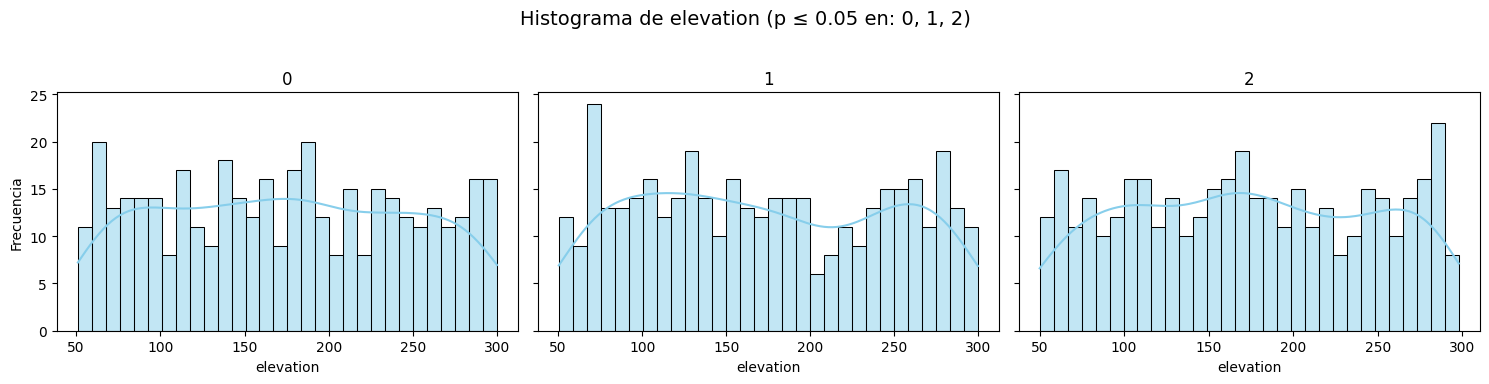

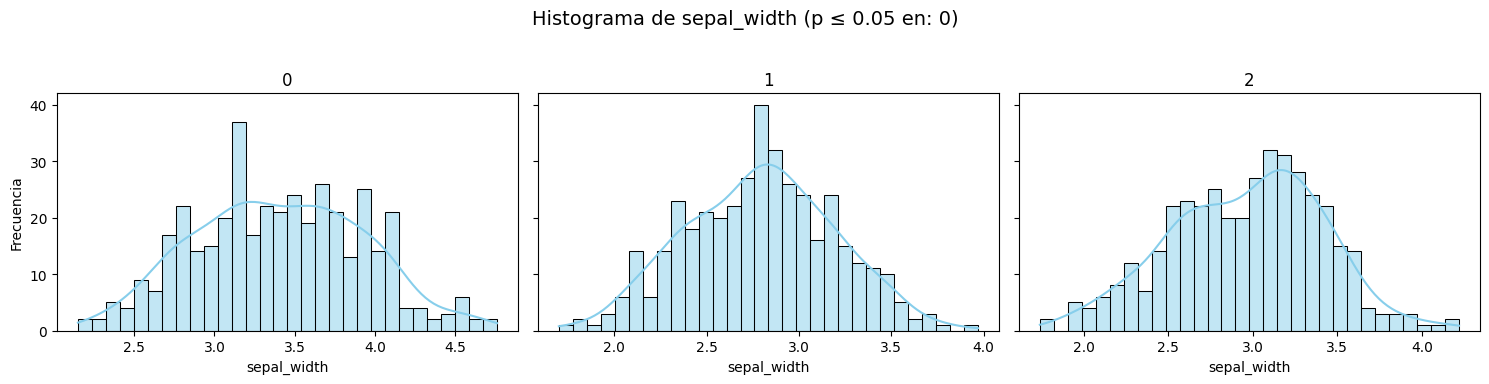

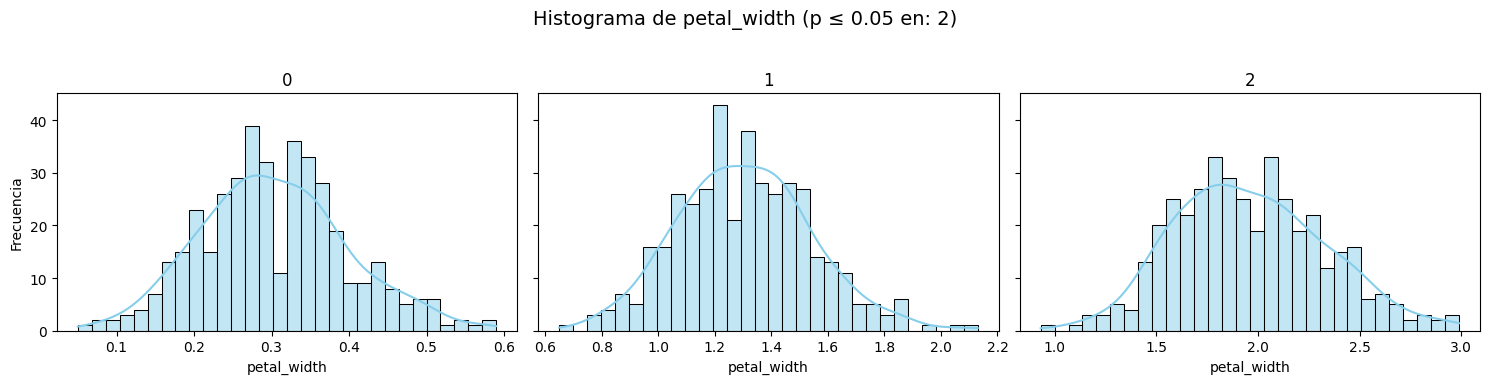

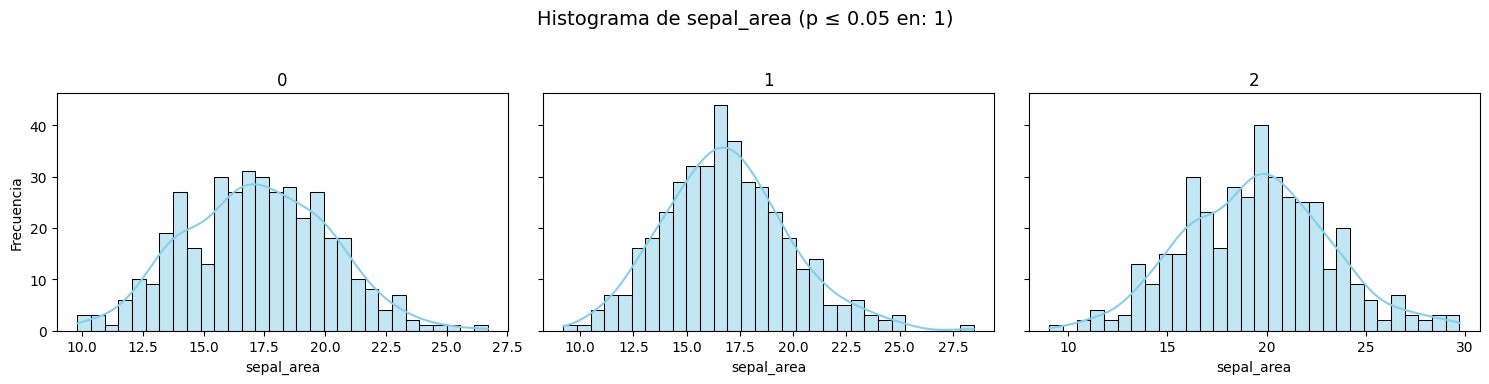

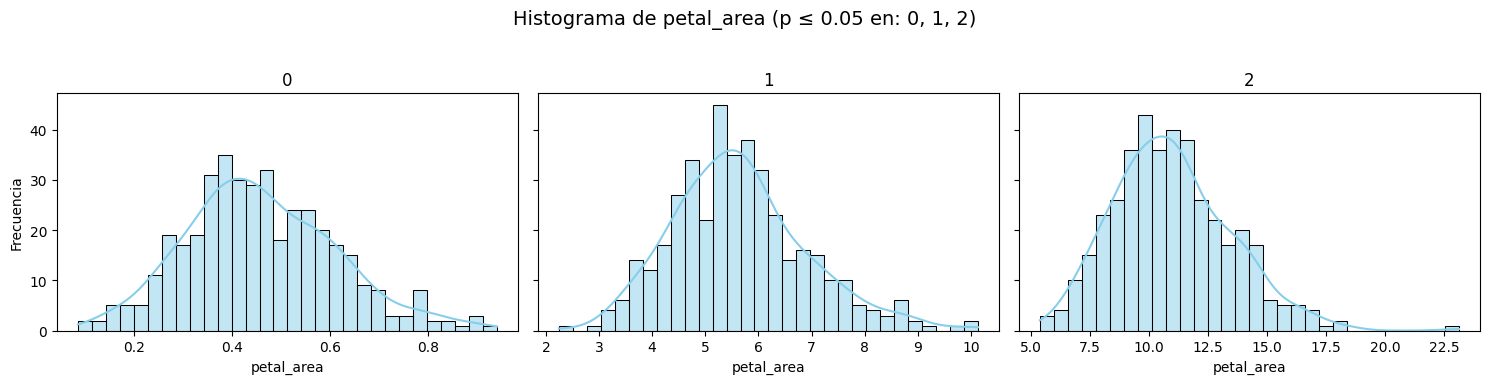

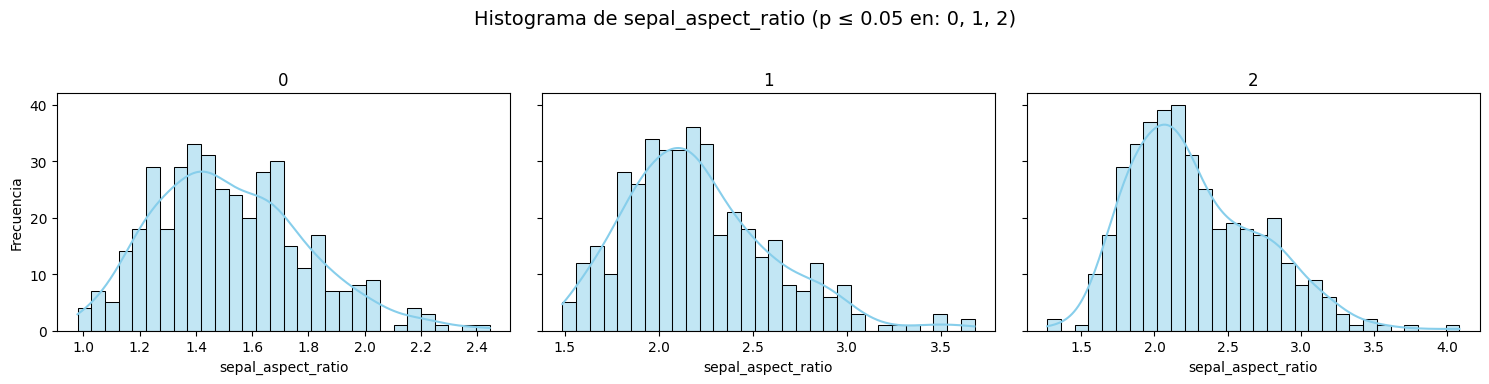

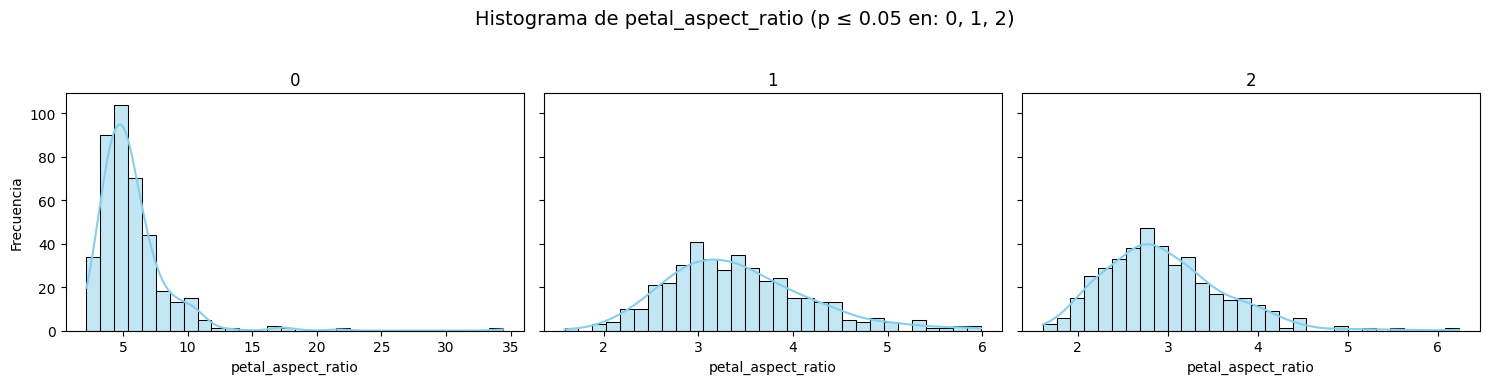

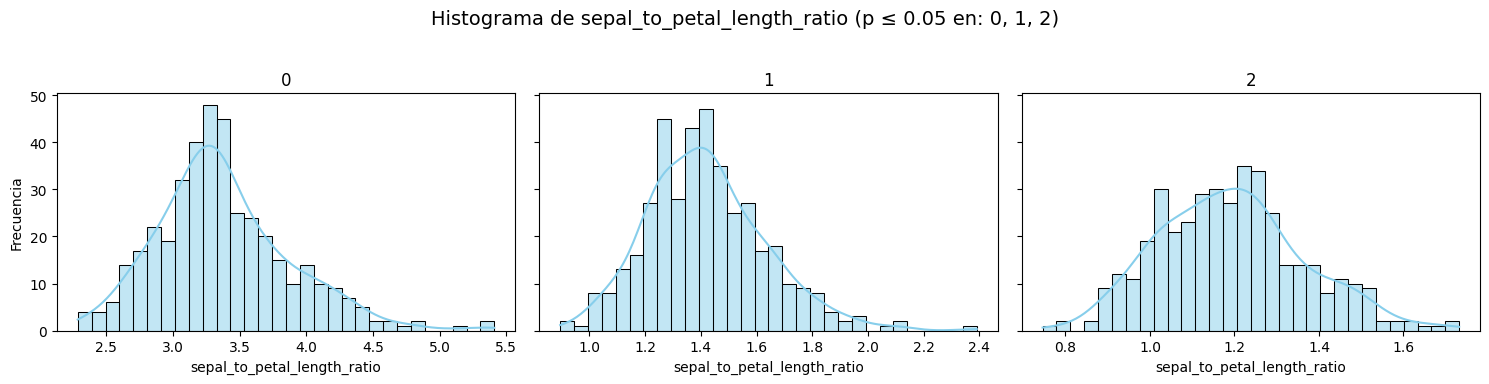

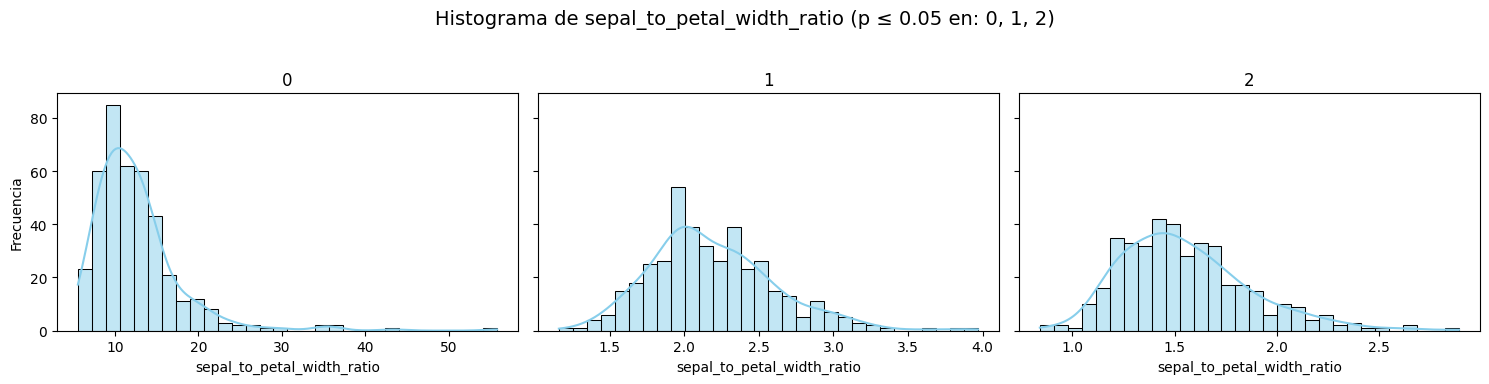

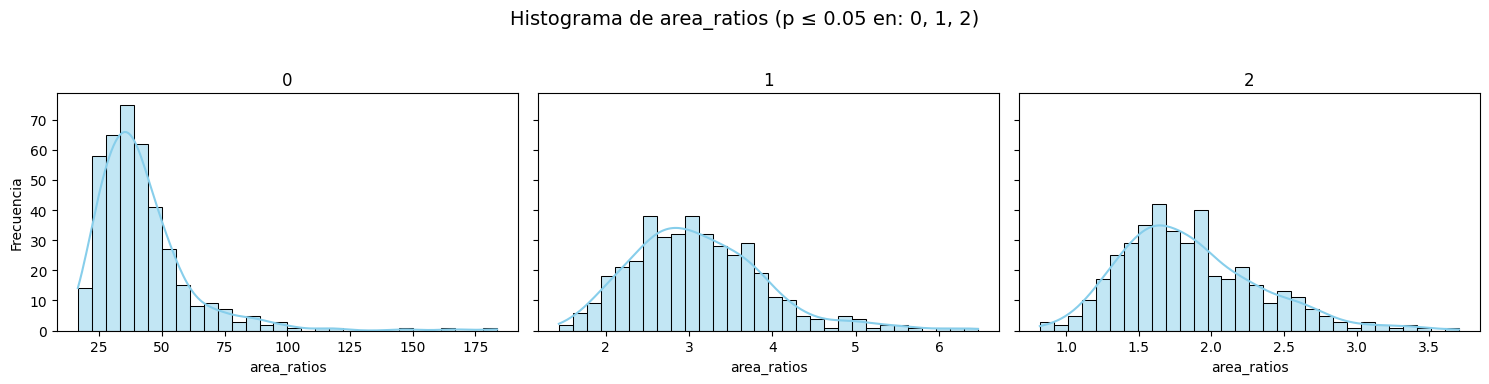

In [13]:
# El código no es mío
# Examinamos visualmente las variables que no han pasado el test anterior

import matplotlib.pyplot as plt
import seaborn as sns

especies = ndf['especies'].unique()
variables = ndf.select_dtypes(include='number').columns

for col in variables:
    # Buscar especies donde la variable no es normal según el diccionario
    no_normales = [esp for esp in especies if not normalidad.get(f"{esp}_{col}", {}).get("Normalidad (p > 0.05)", True)]

    if no_normales:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
        fig.suptitle(f'Histograma de {col} (p ≤ 0.05 en: {", ".join(map(str, no_normales))})', fontsize=14)

        for i, especie in enumerate(especies):
            grupo = ndf[ndf['especies'] == especie]
            sns.histplot(grupo[col], kde=True, bins=30, ax=axes[i], color='skyblue')
            axes[i].set_title(f'{especie}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

🔴 Podemos concluir que, según la prueba de Shapiro-Wilk y un examen visual, las variables de ratios no siguen normalidad (p ~= 0), y puesto que Z-score supone normalidad, no voy a eliminar los outliers que me de Z-score sobre estas variables. Para ello usaré otro método.

In [14]:
from scipy.stats import zscore

# Excluimos las variables no normales
excluir = ['especies', 'elevation', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'area_ratios']


vars_zscore = ndf.select_dtypes(include='number').drop(columns=excluir)

# Aplicamos Z-score
gruposz = ndf.groupby('especies')[vars_zscore.columns].transform(zscore)

outliers = (gruposz.abs() > 3)

print(outliers.sum())

# Filas con al menos un True (es decir, algún outlier en alguna columna)
_outliers = outliers.any(axis=1)
# Nuevo dataframe limpio
nndf1 = ndf[~_outliers].copy() # NewNewDataFrame

nndf1 = nndf1.drop(['especies', 'elevation', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'area_ratios'], axis=1)

sepal_length                       3
sepal_width                        0
petal_length                       2
petal_width                        3
sepal_area                         2
petal_area                         5
sepal_petal_length_diff            2
sepal_petal_width_diff             3
petal_curvature_mm                 4
petal_texture_trichomes_per_mm2    6
leaf_area_cm2                      2
sepal_area_sqrt                    2
petal_area_sqrt                    5
dtype: int64


In [15]:
nndf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sepal_length                     1167 non-null   float64
 1   sepal_width                      1167 non-null   float64
 2   petal_length                     1167 non-null   float64
 3   petal_width                      1167 non-null   float64
 4   sepal_area                       1167 non-null   float64
 5   petal_area                       1167 non-null   float64
 6   sepal_petal_length_diff          1167 non-null   float64
 7   sepal_petal_width_diff           1167 non-null   float64
 8   petal_curvature_mm               1167 non-null   float64
 9   petal_texture_trichomes_per_mm2  1167 non-null   float64
 10  leaf_area_cm2                    1167 non-null   float64
 11  sepal_area_sqrt                  1167 non-null   float64
 12  petal_area_sqrt          

🔴 Vamos a eliminar los outliers de las variables no gaussianas, y para ello voy a valorar 3 posibles alternativas adecuadas para la naturaleza de las variables que me quedan:


*   IQR (Rango intercuantílico). No es necesario normalizar.
*   Isolation Forest. Funcionaría bien pero hay que normalizar, y todavía no se me ha pedido.
*   Autoencoder: Igual, es un modelo muy potente pero hay que normalizar antes.

Debido a que aún no se me pide normalizar, usaré IQR:



In [16]:
# Excluimos las variables normales
excluirr = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_petal_length_diff',
           'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt'
           ]

#ndff = df.copy()

vars_iqr = ndf.select_dtypes(include='number').drop(columns=excluirr)


Q1 = vars_iqr.quantile(0.25)
Q3 = vars_iqr.quantile(0.75)
IQR = Q3 - Q1
limite_inf= Q1 - (1.5 * IQR)
limite_sup = Q3 + (1.5 * IQR)
outliers_iqr=vars_iqr[(vars_iqr < limite_inf) | (vars_iqr > limite_sup)]
outliers_iqr.fillna(False, inplace=True)

print(outliers_iqr.sum())



_outliers_iqr = outliers_iqr.any(axis=1)
# Nuevo dataframe limpio
nndf2 = ndf[~_outliers_iqr].copy()
nndf2 = nndf2.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_petal_length_diff',
                    'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt',
                    'petal_area_sqrt', 'soil_type_clay', 'soil_type_loamy', 'soil_type_sandy'], axis=1)

elevation                               0
sepal_aspect_ratio              49.544271
petal_aspect_ratio             743.331352
sepal_to_petal_length_ratio             0
sepal_to_petal_width_ratio     645.439066
area_ratios                    2440.59585
especies                                0
dtype: object


<ipython-input-16-6162eb75544b>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  outliers_iqr.fillna(False, inplace=True)
<ipython-input-16-6162eb75544b>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outliers_iqr.fillna(False, inplace=True)


In [17]:
nndf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elevation                    1105 non-null   float64
 1   sepal_aspect_ratio           1105 non-null   float64
 2   petal_aspect_ratio           1105 non-null   float64
 3   sepal_to_petal_length_ratio  1105 non-null   float64
 4   sepal_to_petal_width_ratio   1105 non-null   float64
 5   area_ratios                  1105 non-null   float64
 6   especies                     1105 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 69.1 KB


In [18]:
# Fusionamos en un mismo dataframe y ordenamos
nndf = pd.merge(nndf1, nndf2, left_index=True, right_index=True, how='outer')
cdf = nndf[ndf.columns] # Clean Data Frame

In [19]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elevation                        1105 non-null   float64
 1   sepal_length                     1167 non-null   float64
 2   sepal_width                      1167 non-null   float64
 3   petal_length                     1167 non-null   float64
 4   petal_width                      1167 non-null   float64
 5   sepal_area                       1167 non-null   float64
 6   petal_area                       1167 non-null   float64
 7   sepal_aspect_ratio               1105 non-null   float64
 8   petal_aspect_ratio               1105 non-null   float64
 9   sepal_to_petal_length_ratio      1105 non-null   float64
 10  sepal_to_petal_width_ratio       1105 non-null   float64
 11  sepal_petal_length_diff          1167 non-null   float64
 12  sepal_petal_width_diff   

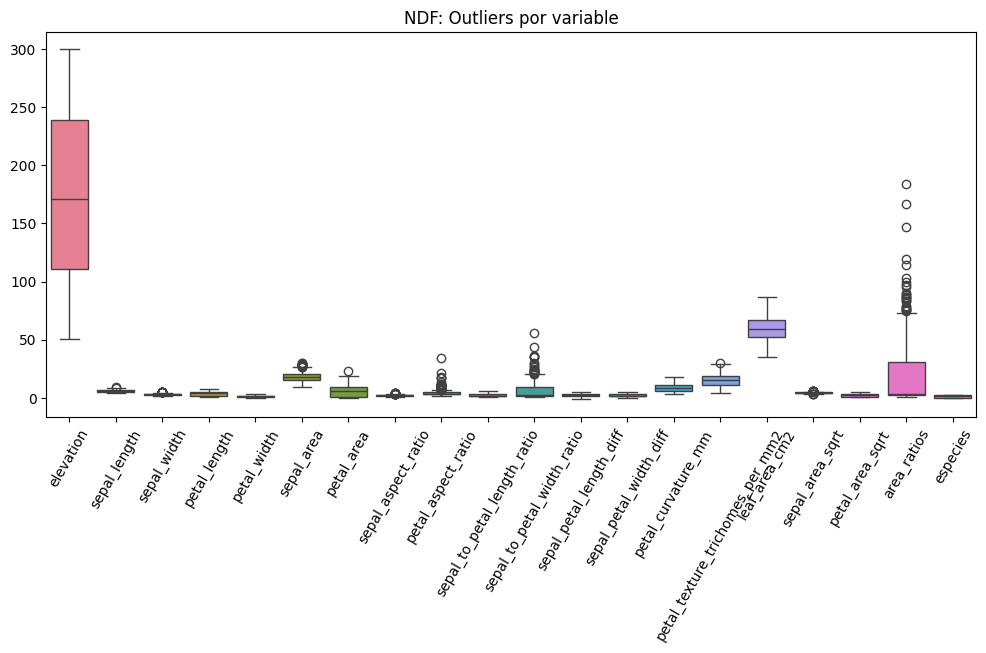

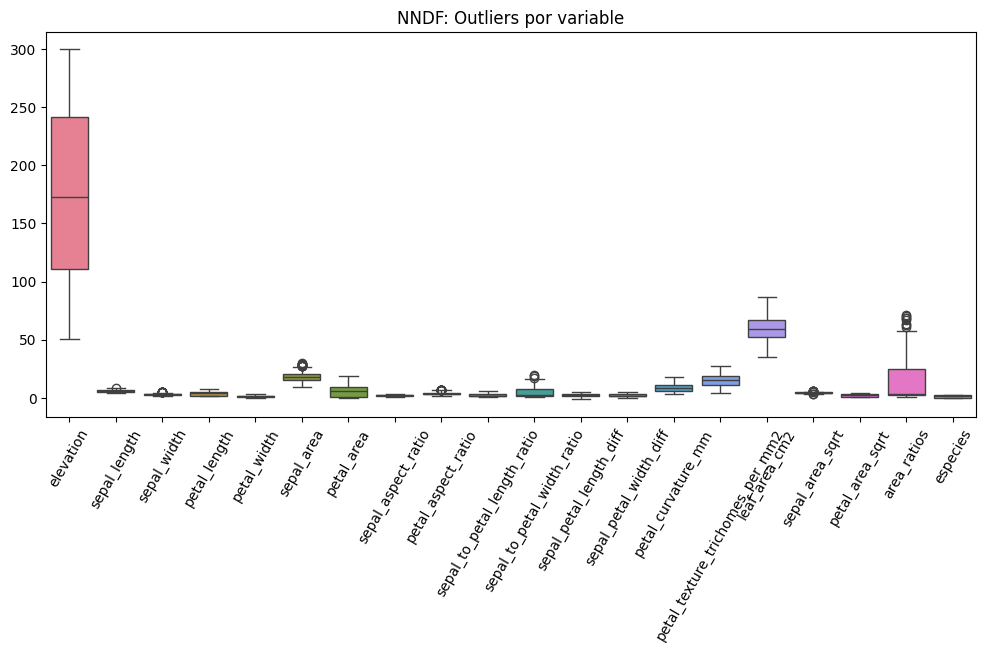

In [20]:
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12,5))
sns.boxplot(data=ndf.select_dtypes(include='number'))
plt.xticks(rotation=60)
plt.title("NDF: Outliers por variable")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=cdf.select_dtypes(include='number'))
plt.xticks(rotation=60)
plt.title("NNDF: Outliers por variable")
plt.show()

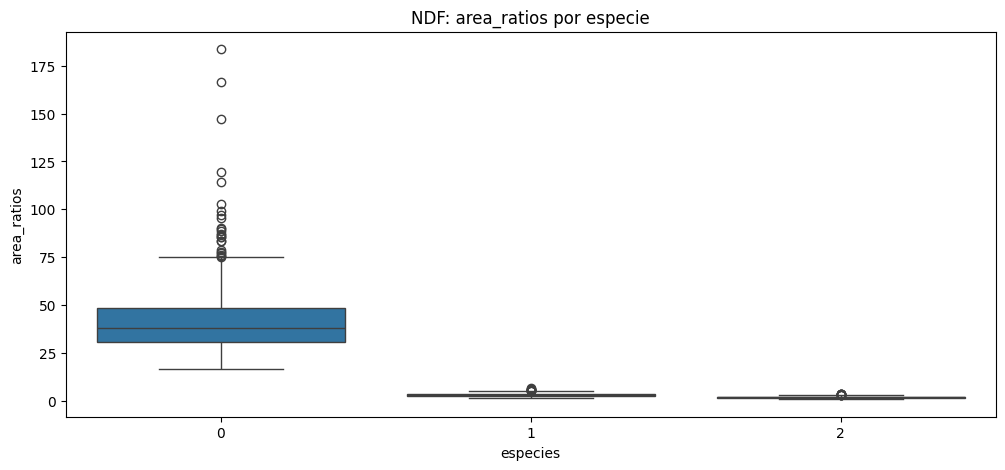

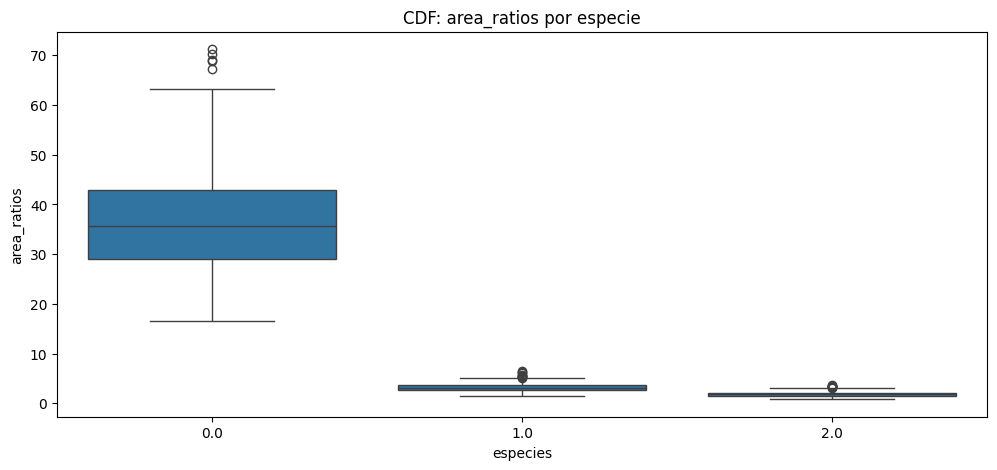

In [21]:
# Vamos a comprobar en una variable específica si se han borrado outliers o no
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12, 5))
sns.boxplot(data=ndf, x='especies', y='area_ratios')
plt.title("NDF: area_ratios por especie")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=cdf, x='especies', y='area_ratios')
plt.title("CDF: area_ratios por especie")
plt.show()

🔴 Aquí se puede apreciar, en contraste con el ejercicio del modelo supervisado donde usé Z-score, la diferencia entre los outliers que detecta y elimina Z-score contra los que elimina IQR (mucho más preciso).

## Estandarización de los datos

In [22]:
from sklearn.preprocessing import StandardScaler

X = cdf.drop('especies', axis=1)
Y = cdf['especies']

estandarizar = X.select_dtypes(include='float64').columns
no_estandarizar = X.select_dtypes(include='bool').columns

# Iniciamos el escalador
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[estandarizar])

scaled_df = pd.DataFrame(X_scaled, columns=estandarizar, index=X.index)
non_scaled = X[no_estandarizar]

# Juntamos las variables estandarizadas y las no estandarizadas
X_final = pd.concat([scaled_df, non_scaled], axis=1)

# Nuevo dataframe estandarizado
sdf = pd.concat([X_final, y], axis=1) # Standarized Data Frame

# Mostrar resultado
sdf.head()


,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,especies
0,-0.181056,-0.866116,0.687882,-1.233530,-1.277013,-0.071902,-1.153607,-1.047527,2.421323,1.227918,2.043352,1.140248,1.289819,-0.952868,0.712916,-0.679555,-0.025381,-1.302655,1.762740,0
1,1.602627,-0.485381,1.914433,-1.296175,-1.125561,1.305343,-1.122871,-1.381744,0.462382,1.660732,1.533057,1.481203,1.821217,-0.772892,1.170905,-0.746265,1.282349,-1.213439,1.637268,0
2,-0.421908,-0.937504,-0.481174,-1.330345,-1.111792,-1.064942,-1.124521,-0.404117,0.221893,1.549077,0.691551,1.227469,0.557894,-0.848671,2.071760,-0.969939,-1.078531,-1.217927,0.806559,0
3,NaN,-1.484812,0.745377,-1.296175,-1.400928,-0.561294,-1.190195,NaN,NaN,NaN,NaN,0.815151,1.410136,-1.211781,1.702344,-0.911077,-0.530688,-1.430996,NaN,0
4,-0.881592,-1.234954,-0.347020,-1.467024,-1.277013,-1.172914,-1.177060,-0.678682,0.999451,2.020011,1.554818,1.219539,0.748395,-1.363340,1.410701,-1.919573,-1.200110,-1.381175,1.900377,0


## Reducción de dimensionalidad PCA (opcional)
Obtener las componentes principales que aglutinen mas del 90% de la varianza de la señal original

In [23]:
# Vuelvo a separar la variable objetivo de las x en SDF
X = sdf.drop('especies', axis=1)
Y = sdf['especies']

Varianza explicada por componente: [0.60108075 0.16550621]


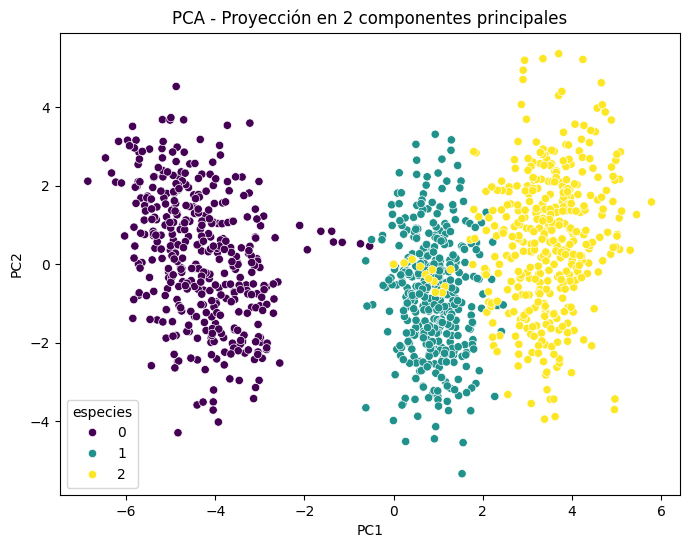

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Pipeline con imputación, escalado y PCA a 2 componentes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()), # Ya escalado anteriormente
    ('pca', PCA(n_components=2))
])

# 3. Ajustar y transformar X con el pipeline
X_pca = pipeline.fit_transform(X)

# 4. Crear DataFrame con PCs y la variable objetivo
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)
pca_df['especies'] = Y

# 5. Mostrar varianza explicada
pca = pipeline.named_steps['pca']
print("Varianza explicada por componente:", pca.explained_variance_ratio_)

# 6. Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='especies', palette='viridis')
plt.title('PCA - Proyección en 2 componentes principales')
plt.show()

A pesar de haber eliminado los outliers de la manera más adecuada para el tipo de distribución de cada variable, parece que cuando se hizo en el ejercicio anterior (modelo supervisado) con Z-score, los clústeres se pueden diferenciar mejor.

# K-Means

Ahora realizamos k-means partiendo de la base que se sabe que son 3 agrupaciones:

In [25]:
# Según hemos visto en la PCA, usaremos un número de clústers k=3



## Representación de los vectores de los tres centroides

## Representación de las predicciones

## Interpretación de las agrupaciones obtenidas

Este código crea un mapa de calor que muestra los valores promedio de cada característica para cada clúster, lo que puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento:



Este código crea un gráfico de barras con líneas de error que muestran los valores promedio y la desviación estándar de cada característica para cada clúster. Esto puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento:


# Clustering jerárquico

Este código aplica un algoritmo de agrupamiento jerárquico a los datos transformados por PCA, y luego genera una visualización del dendrograma resultante. Esto puede ser útil para entender la estructura de los clústeres y cómo se van formando a medida que se aumenta el nivel de agrupamiento:



## Representación de las predicciones

Este código crea una visualización de los resultados de un algoritmo de agrupamiento, mostrando los clústeres en un espacio bidimensional definido por las dos principales componentes principales, y proporciona información adicional sobre la composición de cada clúster:

## Interpretación de las agrupaciones obtenidas

Este código crea un mapa de calor que muestra los valores promedio de cada característica para cada clúster, lo que puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento.

Este código crea un gráfico de barras con líneas de error que muestran los valores promedio y la desviación estándar de cada característica para cada clúster. Esto puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento.